In [1]:
import cv2 as cv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

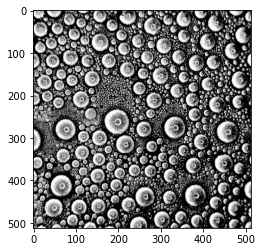

In [63]:
im_in_actual = cv.imread("C:\\Users\\grdmg\\Desktop\\deep\\image_5000.jpeg")
frame_rate = 5000
plt.imshow(im_in_actual)
plt.show()

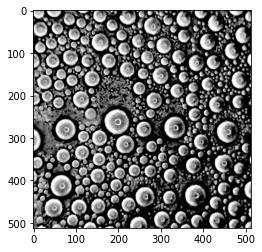

True

In [100]:
# blur the original image

im_blur2 = cv.medianBlur(im_in_actual, 3)
im_blur1 = cv.medianBlur(im_blur2, 3)
im_blur = cv.medianBlur(im_blur1, 3)

plt.imshow(im_blur)
plt.show()

cv.imwrite("image_5000_step1_Blur.jpeg", im_blur)

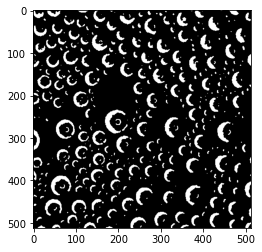

True

In [150]:
# thresholding the original image

th, im_th = cv.threshold(im_blur, 200, 255, cv.THRESH_BINARY);
plt.imshow(im_th)
plt.show()
cv.imwrite("image_5000_step2_thresh.jpeg", im_th)


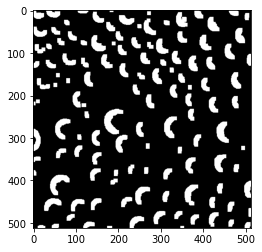

In [151]:
kernel = np.ones((5, 5), np.uint8)
erosion = cv.erode(im_th, kernel, iterations=1)
dilation = cv.dilate(erosion, kernel, iterations=2)
plt.imshow(dilation)
plt.show()
cv.imwrite("image_5000_step3_dilation.jpeg", dilation)

dilation = cv.cvtColor(dilation, cv.COLOR_BGR2GRAY)

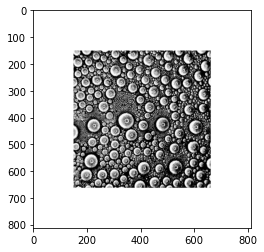

In [158]:
h, w = im_in_actual.shape[:2]
white = np.zeros([h + 300, w + 300, 3], dtype=np.uint8)
white.fill(255)
for i in range(1, h, 1):
    for j in range(1, w, 1):
        white[i + 150, j + 150] = im_in_actual[i, j]
framed_image = white
#framed_image = cv.cvtColor(framed_image, cv.COLOR_BGR2GRAY)
plt.imshow(framed_image)
plt.show()

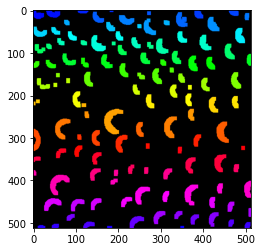

True

In [159]:
def CC(img):
    nlabels, labels, stats, centroids = cv.connectedComponentsWithStats(img)
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0
    return labeled_img, nlabels, labels, stats, centroids

components, nlabels, labels, stats, centroids = CC(dilation)

plt.imshow(components)
plt.show()

cv.imwrite("image_5000_step4_components.jpeg", components)

#stats

In [160]:
final_stats = []
final_centroids = []
f_stat_counter = 0
for i in range(stats.shape[0]):
    if (stats[i][0] < 5) or (stats[i][1] < 5) or (stats[i][4] > 500):
        pass
    else:
        final_stats.append(stats[i])
        final_centroids.append(centroids[i])

#print(final_stats)

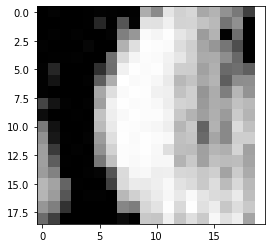

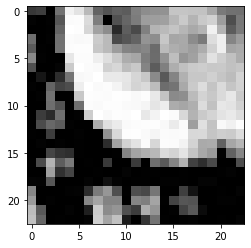

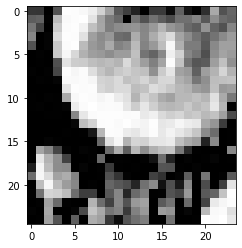

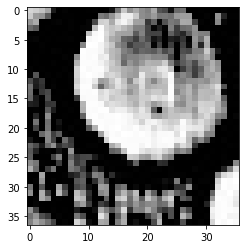

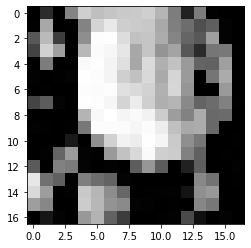

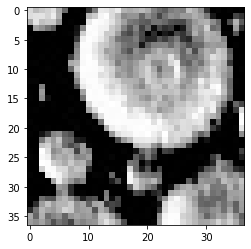

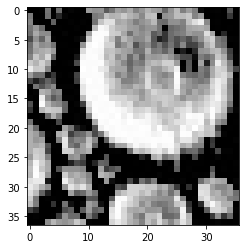

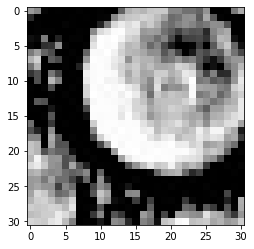

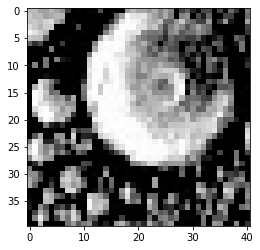

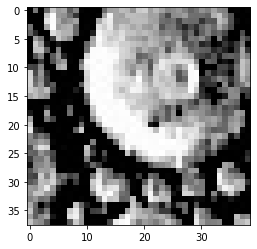

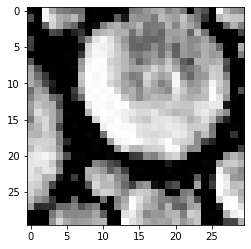

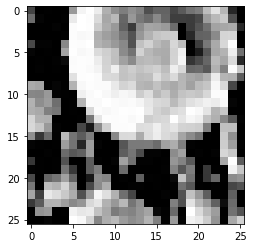

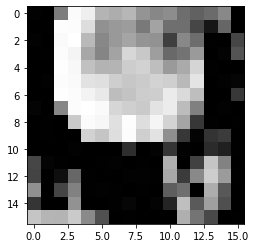

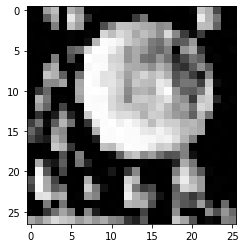

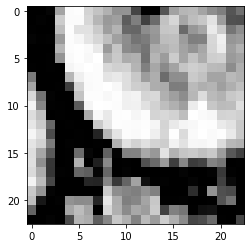

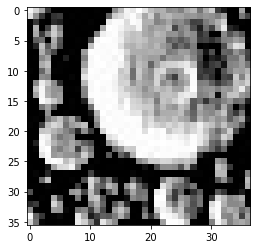

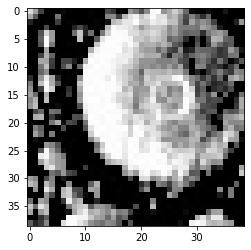

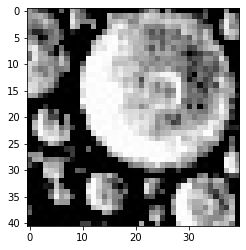

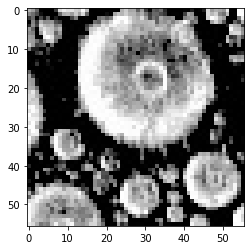

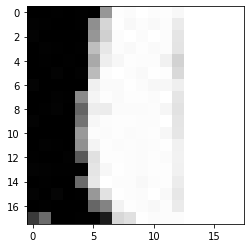

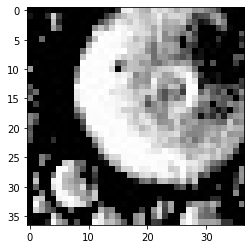

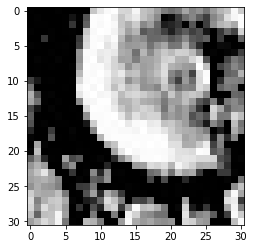

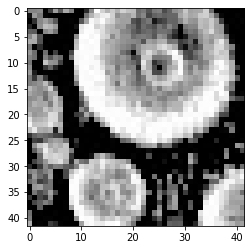

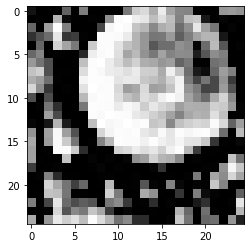

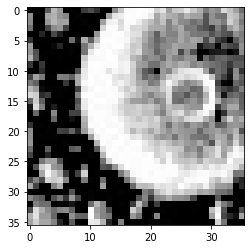

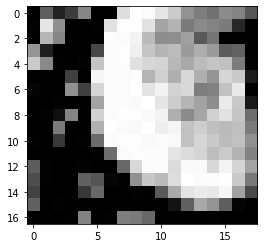

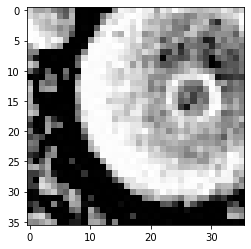

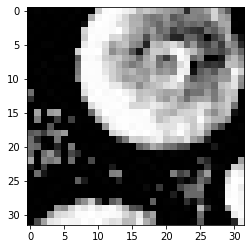

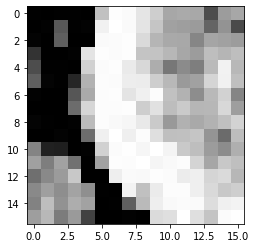

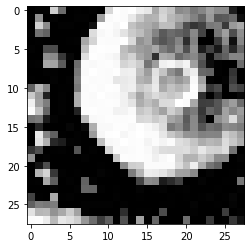

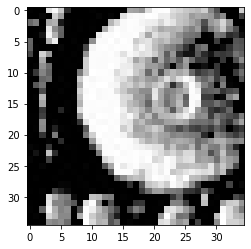

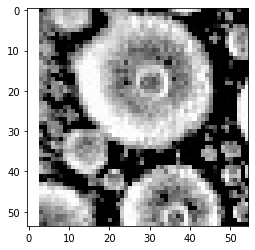

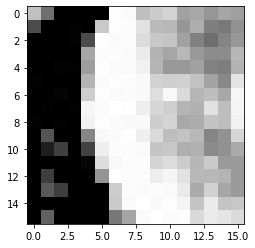

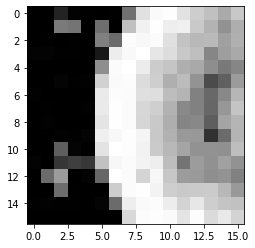

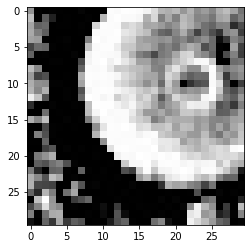

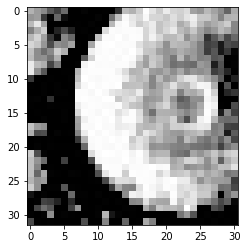

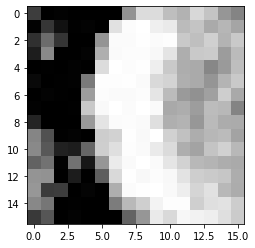

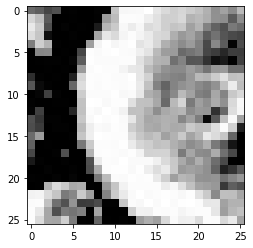

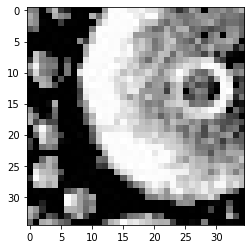

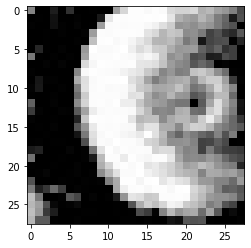

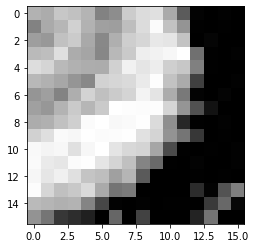

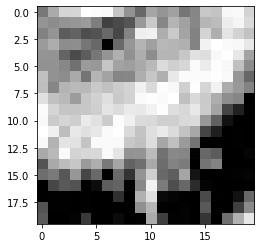

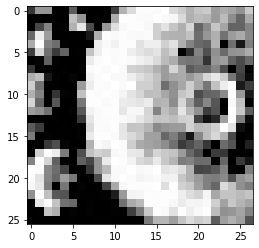

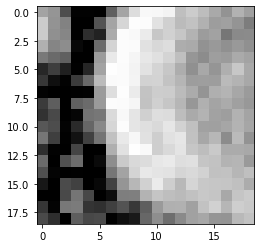

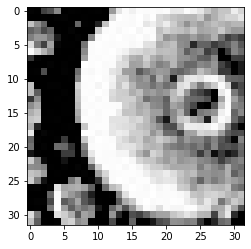

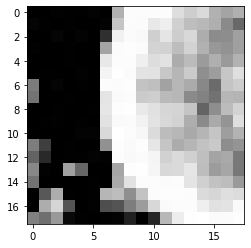

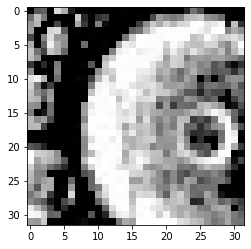

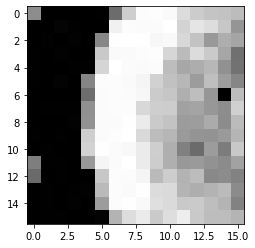

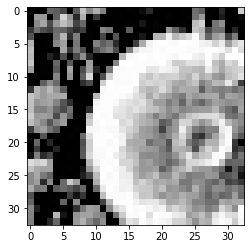

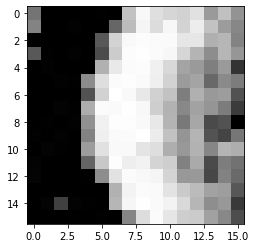

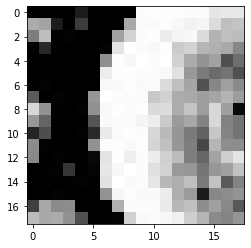

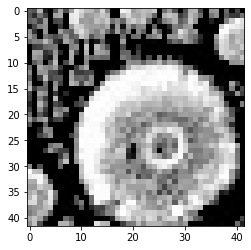

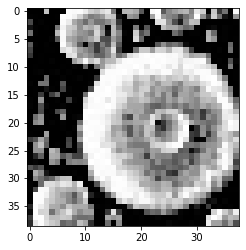

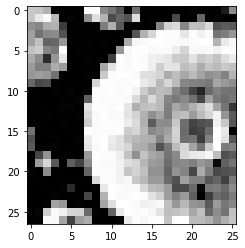

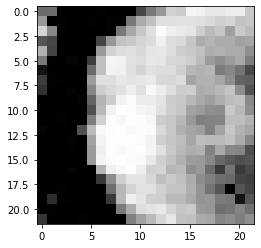

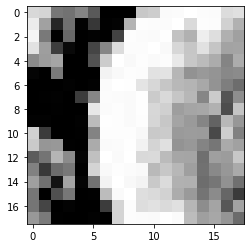

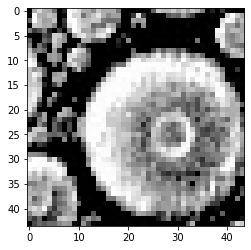

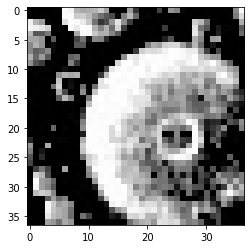

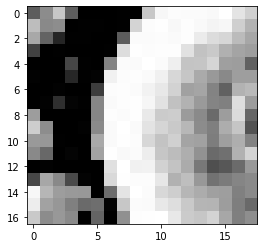

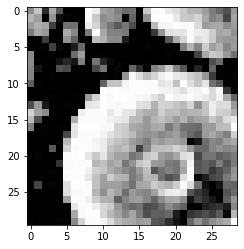

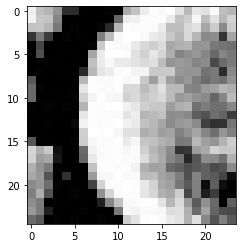

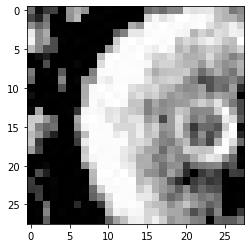

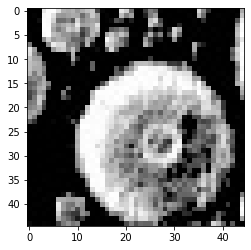

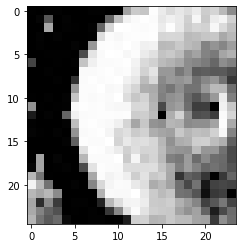

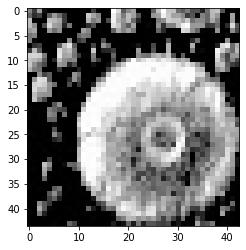

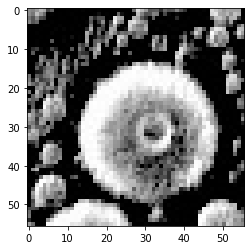

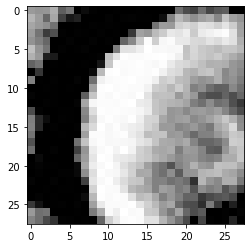

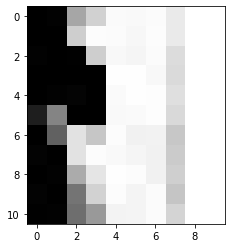

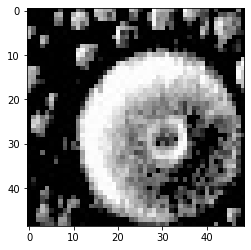

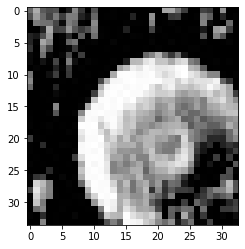

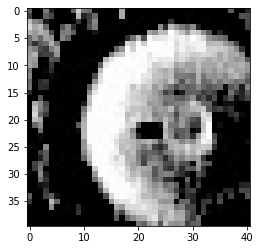

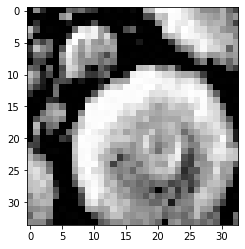

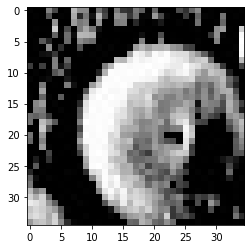

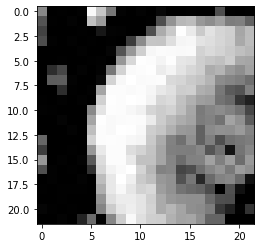

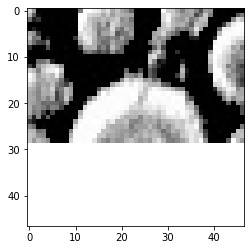

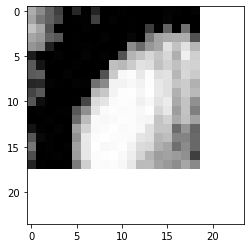

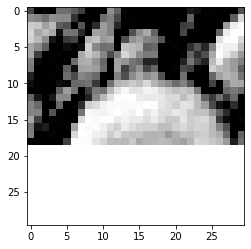

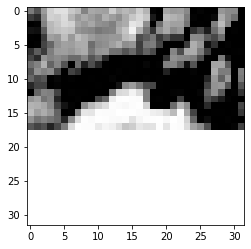

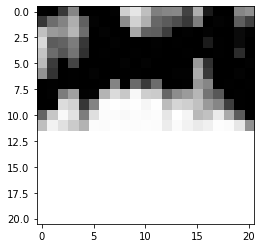

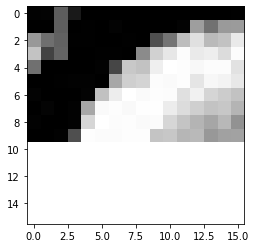

In [161]:
for i in range(len(final_stats)):
    crop_img = framed_image[
                   int(final_centroids[i][1] - 1.5*((final_stats[i][2])/2) + 150):int(
                       final_centroids[i][1] + 2*((final_stats[i][2])/2) + 150), int(final_centroids[i][0] - 1.5*((final_stats[i][2])/2) + 150):int(
                       final_centroids[i][0] + 2*((final_stats[i][2])/2) + 150)]
    cv.imwrite(f"droplet n{i}.jpeg", crop_img)

    plt.imshow(crop_img)
    plt.show()